In [1]:
# Exploratory Data Analysis of the variables in data_raw.csv
#  imports 
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Load data using the correct file path
df = pd.read_csv('data/data_raw.csv', parse_dates=['StartDateTime'])

/var/folders/f6/vz_p0by97sz4s755n87x92q00000gn/T/ipykernel_5340/1755008293.py:13: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('data/data_raw.csv', parse_dates=['StartDateTime'])


In [2]:
# PLOT1: Data Cleaning: Convert columns to appropriate types
df['StartHr'] = df['StartHr'].astype(int)
df['Fuel.Gas'] = pd.to_numeric(df['Fuel.Gas'], errors='coerce')
df['Fuel.Carbon'] = pd.to_numeric(df['Fuel.Carbon'], errors='coerce')
df['DemandForecast-DAM'] = pd.to_numeric(df['DemandForecast-DAM'], errors='coerce')
df['WindForecast-DAM'] = pd.to_numeric(df['WindForecast-DAM'], errors='coerce')
df['NetDemandForecast-DAM'] = pd.to_numeric(df['NetDemandForecast-DAM'], errors='coerce')
df['ISEM DA Price'] = pd.to_numeric(df['ISEM DA Price'], errors='coerce')

In [3]:
# Descriptive stats
print(df.describe())

                       StartDateTime       StartHr    WeekdayNum  \
count                          52560  52560.000000  52560.000000   
mean   2023-07-23 11:45:00.000000256     11.500000      3.998174   
min              2022-01-22 00:00:00      0.000000      1.000000   
25%              2022-10-22 17:52:30      5.750000      2.000000   
50%              2023-07-23 11:45:00     11.500000      4.000000   
75%              2024-04-22 05:37:30     17.250000      6.000000   
max              2025-01-20 23:30:00     23.000000      7.000000   
std                              NaN      6.922252      2.002300   

           Fuel.Gas   Fuel.Carbon  DemandForecast-DAM  WindForecast-DAM  \
count  52560.000000  52560.000000        52560.000000      52560.000000   
mean       1.254072     65.493241         4551.433390       1538.971404   
min        0.000000     43.096700         2833.000000         35.000000   
25%        0.785625     57.762810         3878.000000        590.000000   
50%        0

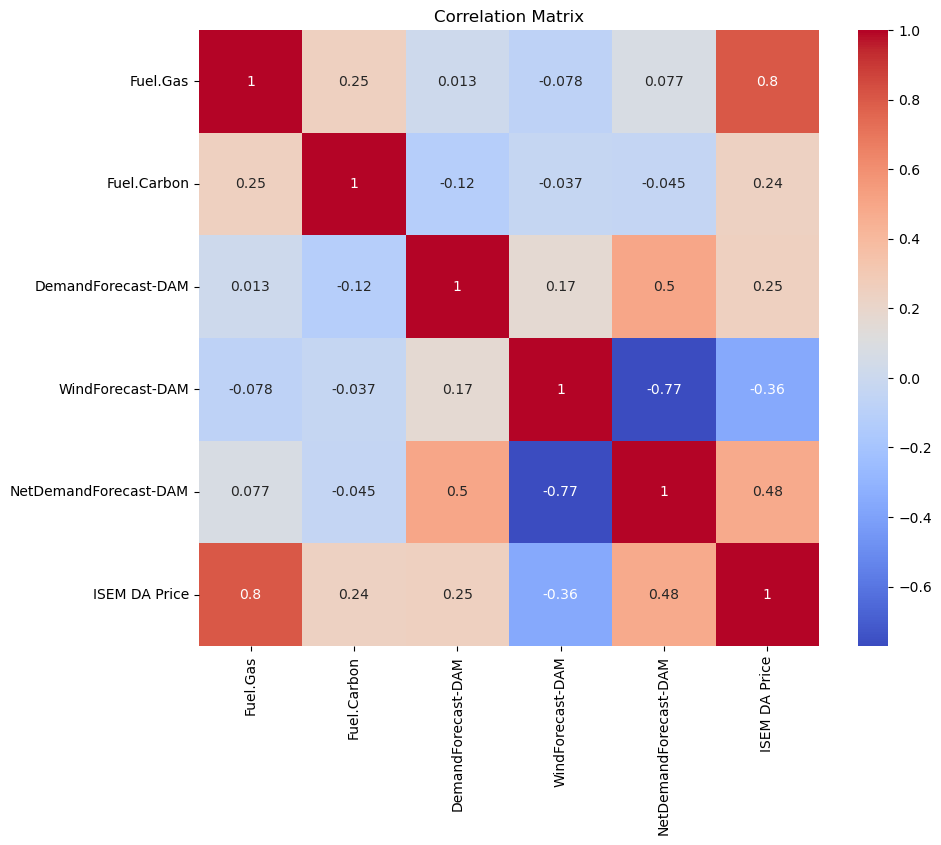

In [5]:
# Time Series: Plot ISEM DA Price over time
fig_time_series = px.line(df, x='StartDateTime', y='ISEM DA Price',
                         title='Time Series of ISEM DA Price',
                         labels={'StartDateTime': 'Time', 'ISEM DA Price': 'ISEM DA Price (£/MWh)'})
fig_time_series.show()

# Correlation Heatmap: Check how numerical variables correlate
plt.figure(figsize=(10,8))
corr_matrix = df[['Fuel.Gas', 'Fuel.Carbon', 'DemandForecast-DAM', 
                  'WindForecast-DAM', 'NetDemandForecast-DAM', 'ISEM DA Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig("data/initial_analysis/correlation_matrix.png")
plt.show()


In [ ]:
# OPTION 1: Using Seaborn (Static scatter plots)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: ISEM DA Price vs Fuel.Gas (Figure 3a)
sns.scatterplot(data=df, x='Fuel.Gas', y='ISEM DA Price', ax=axes[0])
axes[0].set_title('Figure 3a: ISEM DA Price vs Fuel.Gas')
axes[0].set_xlabel('Fuel Gas Price')
axes[0].set_ylabel('ISEM DA Price')

# Plot 2: ISEM DA Price vs WindForecast-DAM (Figure 3b)
sns.scatterplot(data=df, x='WindForecast-DAM', y='ISEM DA Price', ax=axes[1])
axes[1].set_title('Figure 3b: ISEM DA Price vs Wind Forecast')
axes[1].set_xlabel('Wind Forecast (MW)')
axes[1].set_ylabel('ISEM DA Price')

# Plot 3: ISEM DA Price vs NetDemandForecast-DAM (Figure 3c)
sns.scatterplot(data=df, x='NetDemandForecast-DAM', y='ISEM DA Price', ax=axes[2])
axes[2].set_title('Figure 3c: ISEM DA Price vs Net Demand Forecast')
axes[2].set_xlabel('Net Demand Forecast (MW)')
axes[2].set_ylabel('ISEM DA Price')

plt.tight_layout()
plt.savefig("data/initial_analysis/all_scatter_plots.png")
plt.show()

#########################################################################################################

# OPTION 2: interactive plots

# Plot 1: ISEM DA Price vs Fuel.Gas
fig1 = px.scatter(df, x='Fuel.Gas', y='ISEM DA Price',
                 title='ISEM DA Price vs Fuel.Gas',
                 labels={'Fuel.Gas': 'Fuel Gas Price', 'ISEM DA Price': 'ISEM DA Price'},
                 trendline="ols")  # Adds a trend line

# Plot 2: ISEM DA Price vs WindForecast-DAM
fig2 = px.scatter(df, x='WindForecast-DAM', y='ISEM DA Price',
                 title='ISEM DA Price vs Wind Forecast',
                 labels={'WindForecast-DAM': 'Wind Forecast (MW)', 'ISEM DA Price': 'ISEM DA Price'},
                 trendline="ols")

# Plot 3: ISEM DA Price vs NetDemandForecast-DAM
fig3 = px.scatter(df, x='NetDemandForecast-DAM', y='ISEM DA Price',
                 title='ISEM DA Price vs Net Demand Forecast',
                 labels={'NetDemandForecast-DAM': 'Net Demand Forecast (MW)', 'ISEM DA Price': 'ISEM DA Price'},
                 trendline="ols")

# Display the plots
fig1.show()
fig2.show()
fig3.show()